<a href="https://colab.research.google.com/github/sneha5678-cmyk/Marketing-research-methods-Sneha-Gupta_Jio-Institute/blob/main/Amazon_review_500_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


<ipython-input-1-9a8bcd01cad9>:12: DtypeWarning: Columns (1,2,3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Text     Id   ProductId          UserId                      ProfileName  \
0  1.0  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1  2.0  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2  3.0  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3  4.0  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4  5.0  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score          Time  \
0                   1.0                     1.0    5.0  1.303862e+09   
1                   0.0                     0.0    1.0  1.346976e+09   
2                   1.0                     1.0    4.0  1.219018e+09   
3                   3.0                     3.0    2.0  1.307923e+09   
4                   0.0                     0.0    5.0  1.350778e+09   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labele

<ipython-input-1-9a8bcd01cad9>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Sentiment'], palette="coolwarm")


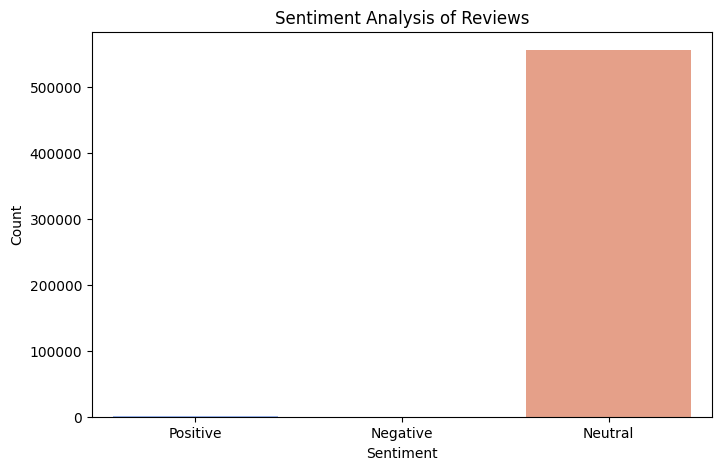

Sentiment Counts:
 Sentiment
Neutral     555629
Positive       551
Negative        69
Name: count, dtype: int64
Processed file saved as: /content/Processed_Reviews.csv


In [1]:
# Install necessary libraries
!pip install vaderSentiment textblob pandas matplotlib seaborn --quiet

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load CSV file (Make sure you've uploaded the file first!)
file_path = "/content/Reviews 500.csv"  # Ensure correct file path
df = pd.read_csv(file_path)

# Preview the data
print("Text", df.head())

# Identify the correct text column name
print("Text", df.columns)

# Assuming the review column is named 'Review' - update if different
text_column = 'Text'  # Change this if your column name is different

# Check if column exists
if text_column not in df.columns:
    raise ValueError(f"Column '{text_column}' not found in dataset. Check column names above.")

# Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def get_sentiment(text):
    if pd.isna(text) or not isinstance(text, str):
        return "Neutral"

    sentiment = analyzer.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return "Positive"
    elif sentiment['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply function to dataset
df['Sentiment'] = df[text_column].apply(get_sentiment)

# Plot sentiment distribution
plt.figure(figsize=(8,5))
sns.countplot(x=df['Sentiment'], palette="coolwarm")
plt.title("Sentiment Analysis of Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Display sentiment counts
print("Sentiment Counts:\n", df['Sentiment'].value_counts())

# Save the output CSV
output_file = "/content/Processed_Reviews.csv"
df.to_csv(output_file, index=False)
print(f"Processed file saved as: {output_file}")

In [7]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon (required for SentimentIntensityAnalyzer)
nltk.download('vader_lexicon')

# Load the dataset
file_path = "/content/Reviews 500.csv"
df = pd.read_csv(file_path)

# Display first few rows to understand the structure
print(df.head())

# Assuming the reviews are stored in a column named 'review'
if 'review' not in df.columns:
    print("Error: The dataset must contain a column named 'review' for sentiment analysis.")
else:
    # Initialize the sentiment analyzer
    sia = SentimentIntensityAnalyzer()

    # Function to compute sentiment scores
    def get_sentiment(text):
        score = sia.polarity_scores(str(text))  # Ensure text is string
        if score['compound'] >= 0.05:
            return "Positive"
        elif score['compound'] <= -0.05:
            return "Negative"
        else:
            return "Neutral"

    # Apply sentiment analysis
    df['Sentiment'] = df['review'].apply(get_sentiment)

    # Display sentiment distribution
    sentiment_counts = df['Sentiment'].value_counts()
    # Plot sentiment distribution
    plt.figure(figsize=(6, 4))
    sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.title("Sentiment Analysis Results")
    plt.xticks(rotation=0)
    plt.show()

    # Display results
    print(df[['review', 'Sentiment']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


    Id   ProductId          UserId                      ProfileName  \
0  1.0  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1  2.0  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2  3.0  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3  4.0  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4  5.0  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score          Time  \
0                   1.0                     1.0    5.0  1.303862e+09   
1                   0.0                     0.0    1.0  1.346976e+09   
2                   1.0                     1.0    4.0  1.219018e+09   
3                   3.0                     3.0    2.0  1.307923e+09   
4                   0.0                     0.0    5.0  1.350778e+09   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as 

<ipython-input-7-326feb9ebc62>:11: DtypeWarning: Columns (1,2,3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [10]:
from google.colab import files
uploaded = files.upload()

Saving Reviews 500.csv to Reviews 500 (1).csv


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-13-243b7044fb71>:11: DtypeWarning: Columns (1,2,3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


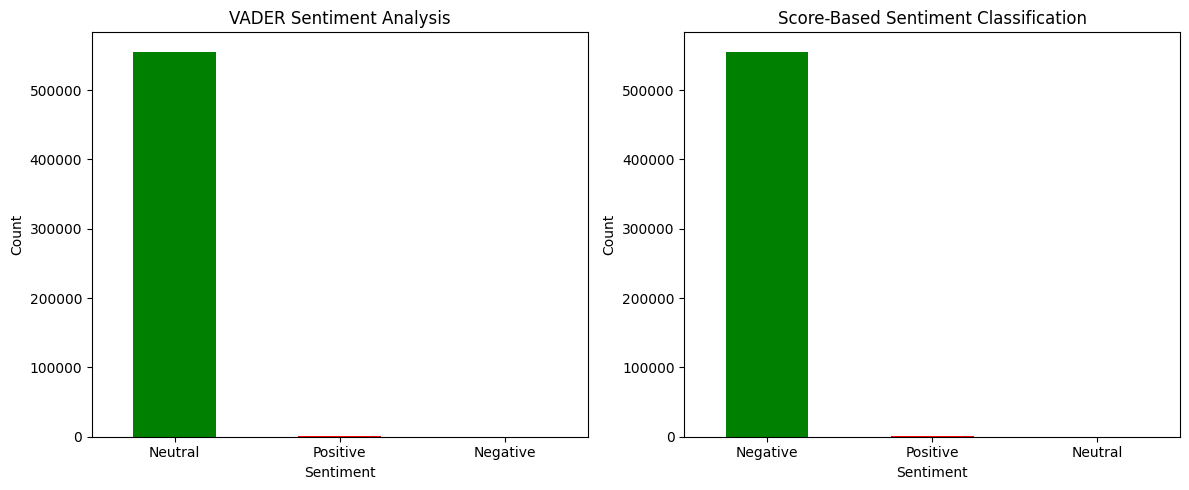

                                                 Text  Score Score_Sentiment  \
0   I have bought several of the Vitality canned d...    5.0        Positive   
1   Product arrived labeled as Jumbo Salted Peanut...    1.0        Negative   
2   This is a confection that has been around a fe...    4.0        Positive   
3   If you are looking for the secret ingredient i...    2.0        Negative   
4   Great taffy at a great price.  There was a wid...    5.0        Positive   
5   I got a wild hair for taffy and ordered this f...    4.0        Positive   
6   This saltwater taffy had great flavors and was...    5.0        Positive   
7   This taffy is so good.  It is very soft and ch...    5.0        Positive   
8   Right now I'm mostly just sprouting this so my...    5.0        Positive   
9   This is a very healthy dog food. Good for thei...    5.0        Positive   
10  I don't know if it's the cactus or the tequila...    5.0        Positive   
11  One of my boys needed to lose some w

In [13]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon (Run this only in Google Colab)
nltk.download('vader_lexicon')

# Load the dataset
file_path = "/content/Reviews 500.csv"  # Adjust if needed
df = pd.read_csv(file_path)

# Ensure the dataset has the correct columns
if 'Text' not in df.columns or 'Score' not in df.columns:
    print("Error: Dataset must contain 'Text' and 'Score' columns")
else:
    # Initialize Sentiment Analyzer
    sia = SentimentIntensityAnalyzer()

    # Function to compute sentiment using VADER
    def get_vader_sentiment(text):
        score = sia.polarity_scores(str(text))  # Convert to string
        if score['compound'] >= 0.05:
            return "Positive"
        elif score['compound'] <= -0.05:
            return "Negative"
        else:
            return "Neutral"

    # Apply VADER sentiment analysis
    df['VADER_Sentiment'] = df['Text'].apply(get_vader_sentiment)

    # Convert "Score" into categorical sentiment
    def get_score_sentiment(score):
        if score >= 4:
            return "Positive"
        elif score == 3:  # Fixed: Changed "=" to "=="
            return "Neutral"
        else:
            return "Negative"

    df['Score_Sentiment'] = df['Score'].apply(get_score_sentiment)

    # Count sentiment distribution
    vader_sentiment_counts = df['VADER_Sentiment'].value_counts()
    score_sentiment_counts = df['Score_Sentiment'].value_counts()

    # Plot Sentiment Analysis Results
    plt.figure(figsize=(12, 5))

    # VADER Sentiment Distribution
    plt.subplot(1, 2, 1)
    vader_sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.title("VADER Sentiment Analysis")
    plt.xticks(rotation=0)

    # Score-Based Sentiment Distribution
    plt.subplot(1, 2, 2)
    score_sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.title("Score-Based Sentiment Classification")
    plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()

    # Show Sample Results
    print(df[['Text', 'Score', 'Score_Sentiment', 'VADER_Sentiment']].head(20))
